In this notebook , VGG19 pretrained model is used for transfer learning and prediction of images of yoga poses.
With out fine tuning, its seen that accuracy of 0.73 is achieved when tested with new yoga pose images.  
Here , fine tuning few layers is carried out and checked for any improvement in model performance.  

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import os
import cv2

Read in images with VGG19 preprocessing.

In [3]:
from keras.preprocessing.image import ImageDataGenerator

vgg19_preprocess = tf.keras.applications.vgg19.preprocess_input
##
image_path = "../input/yoga-poses-cgi/train"
test_path = "../input/yoga-poses-cgi/test"
##

train_data_gen = ImageDataGenerator(preprocessing_function = vgg19_preprocess, validation_split = 0.2)
test_data_gen = ImageDataGenerator(preprocessing_function = vgg19_preprocess)


##
train_ds = train_data_gen.flow_from_directory(image_path , target_size=(224, 224),
        batch_size=32 ,subset = 'training' , seed = 123 , class_mode = 'categorical', color_mode = 'rgb', shuffle = True, save_format = 'jpg')
val_ds = train_data_gen.flow_from_directory(image_path , target_size=(224, 224),
        batch_size=32 ,subset = 'validation' , seed = 123 , class_mode = 'categorical', color_mode = 'rgb', shuffle = True, save_format = 'jpg')

test_ds = test_data_gen.flow_from_directory(test_path ,target_size=(224, 224),
        batch_size=32 ,class_mode = 'categorical', color_mode = 'rgb', shuffle = True, save_format = 'jpg')

Found 800 images belonging to 5 classes.
Found 200 images belonging to 5 classes.
Found 495 images belonging to 5 classes.


In [4]:
labels = (train_ds.class_indices)
labels_dict = dict((v,k) for k,v in labels.items())
labels_dict

{0: 'chair', 1: 'cobra', 2: 'dog', 3: 'tree', 4: 'warrior'}

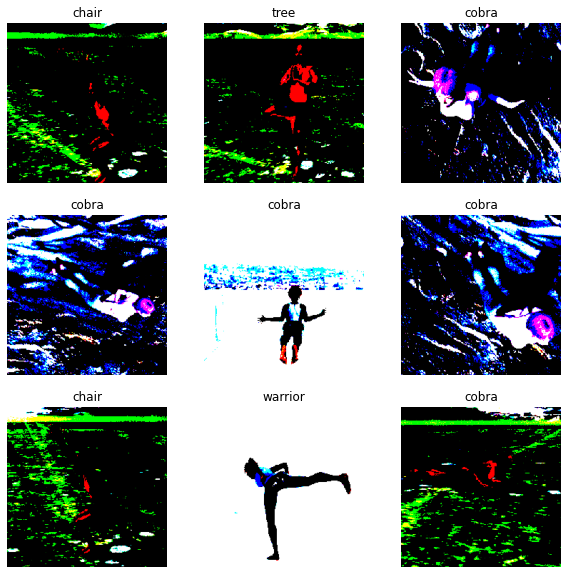

In [5]:
## visualize train set images
image_batch, label_batch = next(iter(train_ds))
label_batch = np.argmax(label_batch,axis=1)
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(cv2.cvtColor(image_batch[i], cv2.COLOR_BGR2RGB))
    label = label_batch[i]
    name = labels_dict[label]
    plt.title(name)
    plt.axis("off")


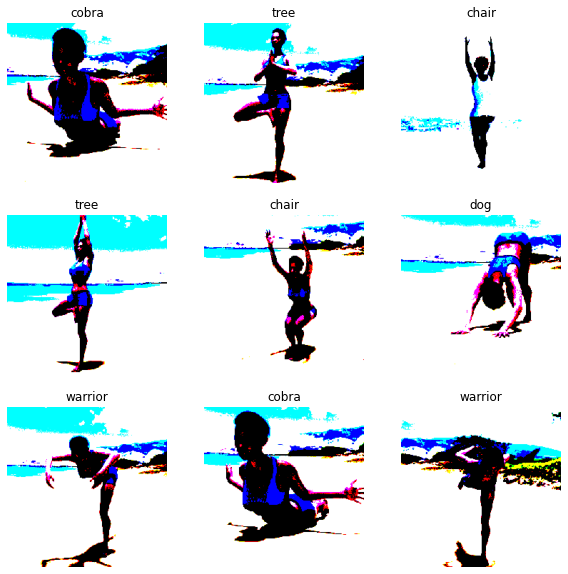

In [6]:
## visualize validation images 
image_batch, label_batch = next(iter(val_ds))
label_batch = np.argmax(label_batch,axis=1)
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    #plt.imshow(image_batch[i])
    plt.imshow(cv2.cvtColor(image_batch[i], cv2.COLOR_BGR2RGB))
    label = label_batch[i]
    name = labels_dict[label]
    plt.title(name)
    plt.axis("off")

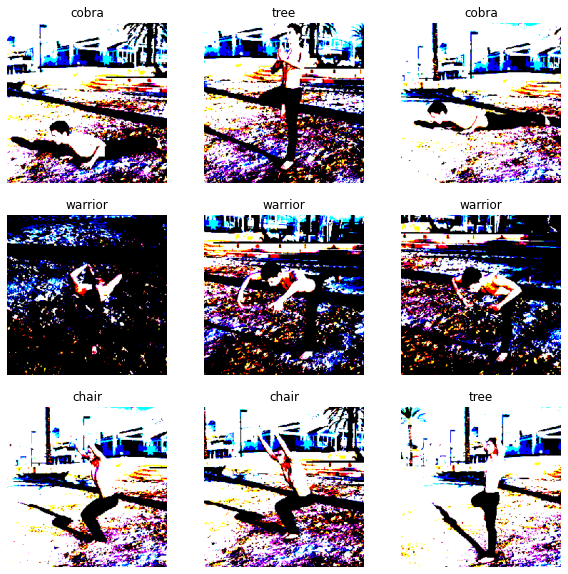

In [7]:
## visualize test images 
image_batch, label_batch = next(iter(test_ds))
label_batch = np.argmax(label_batch,axis=1)
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    #plt.imshow(image_batch[i])
    plt.imshow(cv2.cvtColor(image_batch[i], cv2.COLOR_BGR2RGB))
    label = label_batch[i]
    name = labels_dict[label]
    plt.title(name)
    plt.axis("off")

In [8]:
## Transfer learning with VGG19 , with fine tuning. 
base_Net = tf.keras.applications.VGG19(include_top = False, 
                         weights ='imagenet', 
                         input_shape = (224,224,3), 
                         pooling='avg',
                         )

base_Net.trainable = True

##
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_Net.layers))

2022-02-21 04:41:00.464463: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-21 04:41:00.588270: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-21 04:41:00.589468: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-21 04:41:00.591223: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

80150528/80134624 [==============================] - 1s 0us/step
Number of layers in the base model:  23


In [9]:
for layers in base_Net.layers:
    print(layers)

Fine tune from 18th layer 

Number of layers in the base model:  23
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 512)               20024384  
_________________________________________________________________
dense (Dense)                (None, 1024)              525312    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 5125      
Total params: 20,554,821
Trainable params: 7,609,861
Non-trainable params: 12,944,960
_________________________________________________________________


2022-02-21 04:42:32.575170: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-02-21 04:42:34.415639: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


CPU times: user 3min 31s, sys: 15.4 s, total: 3min 47s
Wall time: 3min 58s
25/25 [==============================] - 6s 244ms/step - loss: 1.7261 - accuracy: 0.7414
Test image accuracy :0.7414141297340393


2022-02-21 04:46:42.133623: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


Classification Report for new test images 
              precision    recall  f1-score   support

       chair       0.50      0.89      0.64        81
       cobra       0.69      0.97      0.81       105
         dog       0.99      1.00      0.99        85
        tree       1.00      0.20      0.33        90
     warrior       0.96      0.64      0.76       102

    accuracy                           0.74       463
   macro avg       0.83      0.74      0.71       463
weighted avg       0.83      0.74      0.71       463



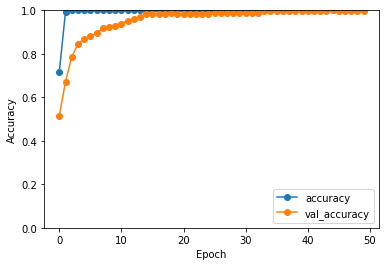

In [10]:
## Transfer learning with VGG19 , with fine tuning. 
base_Net = tf.keras.applications.VGG19(include_top = False, 
                         weights ='imagenet', 
                         input_shape = (224,224,3), 
                         pooling='avg',
                         )

base_Net.trainable = True
base_learning_rate = 0.0001
##
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_Net.layers))

# Fine-tune from this layer onwards
fine_tune_at = 18

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_Net.layers[:fine_tune_at]:
    layer.trainable = False



#Adding the final layers to the above base models where the actual classification is done in the dense layers
model_Net = tf.keras.models.Sequential()
model_Net.add(base_Net)
model_Net.add(tf.keras.layers.Dense(1024))
model_Net.add(tf.keras.layers.Dense(5, activation=tf.nn.softmax))

model_Net.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10), loss = 'categorical_crossentropy', metrics = ['accuracy'])
model_Net.summary()

STEP_SIZE_TRAIN=train_ds.n//train_ds.batch_size
STEP_SIZE_VALID=val_ds.n//val_ds.batch_size
STEP_SIZE_TEST=train_ds.n//train_ds.batch_size

# Training the CNN on the Train data and evaluating it on the val data
%time history = model_Net.fit(train_ds , steps_per_epoch=STEP_SIZE_TRAIN ,  validation_data = val_ds, validation_steps=STEP_SIZE_VALID , epochs = 50, verbose = 0 )

##
test_loss, test_acc = model_Net.evaluate(test_ds , steps=STEP_SIZE_TEST)
print("Test image accuracy :{}".format(test_acc))
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
##
model_Net.save('model_vgg19_1')

loops = int(np.round(test_ds.n/32)) ## no of batches 
actual = np.array([])
predicted = np.array([])
img = []
for k in range(loops):
    x,y = test_ds.next()
    predictions =  np.argmax(model_Net.predict(x), axis = -1)
    img.append(x)
    predicted = np.concatenate([predicted ,predictions])
    actual = np.concatenate([actual , np.argmax(y,axis=1)])
    
##
print('Classification Report for new test images ')
print(classification_report(actual, predicted, target_names=[v for k,v in labels_dict.items()]))
##



### Read in the new test images

In [11]:
## read in all the new test yoga poses and check the prediction 

test_path_2 = "../input/new-yoga-poses/yoga_test_data"
test_ds_2 = test_data_gen.flow_from_directory(test_path_2 ,target_size=(224, 224),
        batch_size=32 ,class_mode = 'categorical', color_mode = 'rgb', shuffle = True, save_format = 'jpg')


Found 26 images belonging to 5 classes.


In [12]:
loops = int(np.round(test_ds_2.n/32)) ## no of batches 
actual = np.array([])
predicted = np.array([])
img = []
for k in range(loops):
    x,y = test_ds_2.next()
    predictions =  np.argmax(model_Net.predict(x), axis = -1)
    img.append(x)
    predicted = np.concatenate([predicted ,predictions])
    actual = np.concatenate([actual , np.argmax(y,axis=1)])
    
##
print('Classification Report for new test images ')
print(classification_report(actual, predicted, target_names=[v for k,v in labels_dict.items()]))

Classification Report for new test images 
              precision    recall  f1-score   support

       chair       0.50      0.17      0.25         6
       cobra       0.00      0.00      0.00         5
         dog       0.60      0.60      0.60         5
        tree       0.33      0.80      0.47         5
     warrior       0.50      0.60      0.55         5

    accuracy                           0.42        26
   macro avg       0.39      0.43      0.37        26
weighted avg       0.39      0.42      0.37        26



The accuracy has reduced drastically as compared to non fine tuned model.

Fine tune from 20th layer

Number of layers in the base model:  23
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 512)               20024384  
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 5125      
Total params: 20,554,821
Trainable params: 2,890,245
Non-trainable params: 17,664,576
_________________________________________________________________
CPU times: user 3min 24s, sys: 11.8 s, total: 3min 35s
Wall time: 3min 49s
25/25 [==============================] - 2s 83ms/step - loss: 0.9390 - accuracy: 0.7313
Test image accuracy :0.7313131093978882
Classification Report for new test images 
              precision    recall  f1-score   support

       chair       1.00

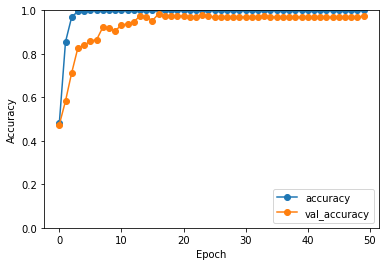

In [13]:
## Transfer learning with VGG19 , with fine tuning. 
base_Net = tf.keras.applications.VGG19(include_top = False, 
                         weights ='imagenet', 
                         input_shape = (224,224,3), 
                         pooling='avg',
                         )

base_Net.trainable = True
base_learning_rate = 0.0001
##
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_Net.layers))

# Fine-tune from this layer onwards
fine_tune_at = 20

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_Net.layers[:fine_tune_at]:
    layer.trainable = False



#Adding the final layers to the above base models where the actual classification is done in the dense layers
model_Net = tf.keras.models.Sequential()
model_Net.add(base_Net)
model_Net.add(tf.keras.layers.Dense(1024))
model_Net.add(tf.keras.layers.Dense(5, activation=tf.nn.softmax))

model_Net.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10), loss = 'categorical_crossentropy', metrics = ['accuracy'])
model_Net.summary()

STEP_SIZE_TRAIN=train_ds.n//train_ds.batch_size
STEP_SIZE_VALID=val_ds.n//val_ds.batch_size
STEP_SIZE_TEST=train_ds.n//train_ds.batch_size

# Training the CNN on the Train data and evaluating it on the val data
%time history = model_Net.fit(train_ds , steps_per_epoch=STEP_SIZE_TRAIN ,  validation_data = val_ds, validation_steps=STEP_SIZE_VALID , epochs = 50, verbose = 0 )

##
test_loss, test_acc = model_Net.evaluate(test_ds , steps=STEP_SIZE_TEST)
print("Test image accuracy :{}".format(test_acc))
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
##
model_Net.save('model_vgg19_2')

loops = int(np.round(test_ds.n/32)) ## no of batches 
actual = np.array([])
predicted = np.array([])
img = []
for k in range(loops):
    x,y = test_ds.next()
    predictions =  np.argmax(model_Net.predict(x), axis = -1)
    img.append(x)
    predicted = np.concatenate([predicted ,predictions])
    actual = np.concatenate([actual , np.argmax(y,axis=1)])
    
##
print('Classification Report for new test images ')
print(classification_report(actual, predicted, target_names=[v for k,v in labels_dict.items()]))

In [14]:
loops = int(np.round(test_ds_2.n/32)) ## no of batches 
actual = np.array([])
predicted = np.array([])
img = []
for k in range(loops):
    x,y = test_ds_2.next()
    predictions =  np.argmax(model_Net.predict(x), axis = -1)
    img.append(x)
    predicted = np.concatenate([predicted ,predictions])
    actual = np.concatenate([actual , np.argmax(y,axis=1)])
    
##
print('Classification Report for new test images ')
print(classification_report(actual, predicted, target_names=[v for k,v in labels_dict.items()]))

Classification Report for new test images 
              precision    recall  f1-score   support

       chair       0.50      0.17      0.25         6
       cobra       0.67      0.40      0.50         5
         dog       0.83      1.00      0.91         5
        tree       0.50      1.00      0.67         5
     warrior       0.40      0.40      0.40         5

    accuracy                           0.58        26
   macro avg       0.58      0.59      0.55        26
weighted avg       0.58      0.58      0.53        26



Again , no great improvement in the accuracy with fine tuning.

Fine tune from 19th layer 

Number of layers in the base model:  23
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 512)               20024384  
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 5125      
Total params: 20,554,821
Trainable params: 5,250,053
Non-trainable params: 15,304,768
_________________________________________________________________
CPU times: user 3min 27s, sys: 11.7 s, total: 3min 38s
Wall time: 3min 48s
25/25 [==============================] - 4s 149ms/step - loss: 0.6058 - accuracy: 0.9010
Test image accuracy :0.9010100960731506
Classification Report for new test images 
              precision    recall  f1-score   support

       chair       1.0

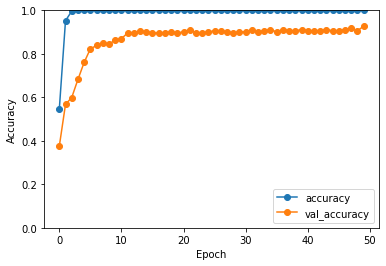

In [16]:
## Transfer learning with VGG19 , with fine tuning. 
base_Net = tf.keras.applications.VGG19(include_top = False, 
                         weights ='imagenet', 
                         input_shape = (224,224,3), 
                         pooling='avg',
                         )

base_Net.trainable = True
base_learning_rate = 0.0001
##
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_Net.layers))

# Fine-tune from this layer onwards
fine_tune_at = 19

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_Net.layers[:fine_tune_at]:
    layer.trainable = False



#Adding the final layers to the above base models where the actual classification is done in the dense layers
model_Net = tf.keras.models.Sequential()
model_Net.add(base_Net)
model_Net.add(tf.keras.layers.Dense(1024))
model_Net.add(tf.keras.layers.Dense(5, activation=tf.nn.softmax))

model_Net.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10), loss = 'categorical_crossentropy', metrics = ['accuracy'])
model_Net.summary()

STEP_SIZE_TRAIN=train_ds.n//train_ds.batch_size
STEP_SIZE_VALID=val_ds.n//val_ds.batch_size
STEP_SIZE_TEST=train_ds.n//train_ds.batch_size

# Training the CNN on the Train data and evaluating it on the val data
%time history = model_Net.fit(train_ds , steps_per_epoch=STEP_SIZE_TRAIN ,  validation_data = val_ds, validation_steps=STEP_SIZE_VALID , epochs = 50, verbose = 0 )

##
test_loss, test_acc = model_Net.evaluate(test_ds , steps=STEP_SIZE_TEST)
print("Test image accuracy :{}".format(test_acc))
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
##
model_Net.save('model_vgg19_3')

loops = int(np.round(test_ds.n/32)) ## no of batches 
actual = np.array([])
predicted = np.array([])
img = []
for k in range(loops):
    x,y = test_ds.next()
    predictions =  np.argmax(model_Net.predict(x), axis = -1)
    img.append(x)
    predicted = np.concatenate([predicted ,predictions])
    actual = np.concatenate([actual , np.argmax(y,axis=1)])
    
##
print('Classification Report for new test images ')
print(classification_report(actual, predicted, target_names=[v for k,v in labels_dict.items()]))

In [17]:
loops = int(np.round(test_ds_2.n/32)) ## no of batches 
actual = np.array([])
predicted = np.array([])
img = []
for k in range(loops):
    x,y = test_ds_2.next()
    predictions =  np.argmax(model_Net.predict(x), axis = -1)
    img.append(x)
    predicted = np.concatenate([predicted ,predictions])
    actual = np.concatenate([actual , np.argmax(y,axis=1)])
    
##
print('Classification Report for new test images ')
print(classification_report(actual, predicted, target_names=[v for k,v in labels_dict.items()]))

Classification Report for new test images 
              precision    recall  f1-score   support

       chair       0.67      0.33      0.44         6
       cobra       0.60      0.60      0.60         5
         dog       1.00      0.60      0.75         5
        tree       0.50      0.80      0.62         5
     warrior       0.43      0.60      0.50         5

    accuracy                           0.58        26
   macro avg       0.64      0.59      0.58        26
weighted avg       0.64      0.58      0.58        26



No change in the accuracy.

Change the optimiser 

Number of layers in the base model:  23
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 512)               20024384  
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dense_13 (Dense)             (None, 5)                 5125      
Total params: 20,554,821
Trainable params: 2,890,245
Non-trainable params: 17,664,576
_________________________________________________________________
CPU times: user 3min 24s, sys: 11.1 s, total: 3min 35s
Wall time: 3min 53s
25/25 [==============================] - 2s 87ms/step - loss: 0.1935 - accuracy: 0.9515
Test image accuracy :0.951515

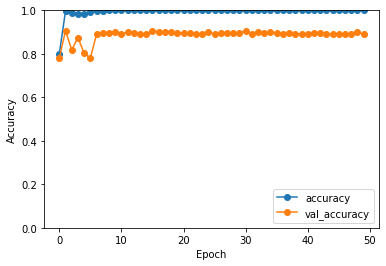

In [20]:
## Transfer learning with VGG19 , with fine tuning and adam optimizer 
base_Net = tf.keras.applications.VGG19(include_top = False, 
                         weights ='imagenet', 
                         input_shape = (224,224,3), 
                         pooling='avg',
                         )

base_Net.trainable = True

##
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_Net.layers))

# Fine-tune from this layer onwards
fine_tune_at = 20

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_Net.layers[:fine_tune_at]:
    layer.trainable = False



#Adding the final layers to the above base models where the actual classification is done in the dense layers
model_Net = tf.keras.models.Sequential()
model_Net.add(base_Net)
model_Net.add(tf.keras.layers.Flatten())
model_Net.add(tf.keras.layers.Dense(1024))
model_Net.add(tf.keras.layers.Dense(5, activation=tf.nn.softmax))

model_Net.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model_Net.summary()

STEP_SIZE_TRAIN=train_ds.n//train_ds.batch_size
STEP_SIZE_VALID=val_ds.n//val_ds.batch_size
STEP_SIZE_TEST=train_ds.n//train_ds.batch_size

# Training the CNN on the Train data and evaluating it on the val data
%time history = model_Net.fit(train_ds , steps_per_epoch=STEP_SIZE_TRAIN ,  validation_data = val_ds, validation_steps=STEP_SIZE_VALID , epochs = 50, verbose = 0 )

##
test_loss, test_acc = model_Net.evaluate(test_ds , steps=STEP_SIZE_TEST)
print("Test image accuracy :{}".format(test_acc))
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
##
model_Net.save('model_vgg19_4')

loops = int(np.round(test_ds.n/32)) ## no of batches 
actual = np.array([])
predicted = np.array([])
img = []
for k in range(loops):
    x,y = test_ds.next()
    predictions =  np.argmax(model_Net.predict(x), axis = -1)
    img.append(x)
    predicted = np.concatenate([predicted ,predictions])
    actual = np.concatenate([actual , np.argmax(y,axis=1)])
    
##
print('Classification Report for new test images ')
print(classification_report(actual, predicted, target_names=[v for k,v in labels_dict.items()]))

In [21]:
loops = int(np.round(test_ds_2.n/32)) ## no of batches 
actual = np.array([])
predicted = np.array([])
img = []
for k in range(loops):
    x,y = test_ds_2.next()
    predictions =  np.argmax(model_Net.predict(x), axis = -1)
    img.append(x)
    predicted = np.concatenate([predicted ,predictions])
    actual = np.concatenate([actual , np.argmax(y,axis=1)])
    
##
print('Classification Report for new test images ')
print(classification_report(actual, predicted, target_names=[v for k,v in labels_dict.items()]))

Classification Report for new test images 
              precision    recall  f1-score   support

       chair       1.00      0.67      0.80         6
       cobra       0.71      1.00      0.83         5
         dog       0.83      1.00      0.91         5
        tree       0.62      1.00      0.77         5
     warrior       1.00      0.20      0.33         5

    accuracy                           0.77        26
   macro avg       0.83      0.77      0.73        26
weighted avg       0.84      0.77      0.73        26



Improvement in accuracy from 0.73 to 0.77 as shown above. 

Fine tune from layer 20 . Include drop out 

Number of layers in the base model:  23
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 512)               20024384  
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 5)                 5125      
Total params: 20,554,821
Trainable params: 2,890,245
Non-trainable params: 17,664,576
_________________________________________________________________
CPU times: user 3min 24s, sys: 11.3 s, total: 3min 35s
Wall 

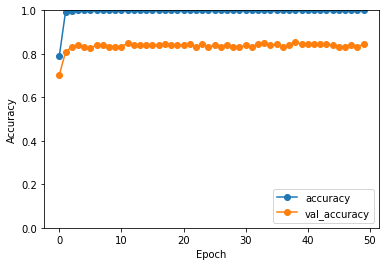

In [22]:
## Transfer learning with VGG19 , with fine tuning and drop out.
base_Net = tf.keras.applications.VGG19(include_top = False, 
                         weights ='imagenet', 
                         input_shape = (224,224,3), 
                         pooling='avg',
                         )

base_Net.trainable = True
base_learning_rate = 0.0001
##
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_Net.layers))

# Fine-tune from this layer onwards
fine_tune_at = 20

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_Net.layers[:fine_tune_at]:
    layer.trainable = False



#Adding the final layers to the above base models where the actual classification is done in the dense layers
model_Net = tf.keras.models.Sequential()
model_Net.add(base_Net)
model_Net.add(tf.keras.layers.Flatten())
model_Net.add(tf.keras.layers.Dense(1024))
model_Net.add(tf.keras.layers.Dropout(0.2))
model_Net.add(tf.keras.layers.Dense(5, activation=tf.nn.softmax))

model_Net.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model_Net.summary()

STEP_SIZE_TRAIN=train_ds.n//train_ds.batch_size
STEP_SIZE_VALID=val_ds.n//val_ds.batch_size
STEP_SIZE_TEST=train_ds.n//train_ds.batch_size

# Training the CNN on the Train data and evaluating it on the val data
%time history = model_Net.fit(train_ds , steps_per_epoch=STEP_SIZE_TRAIN ,  validation_data = val_ds, validation_steps=STEP_SIZE_VALID , epochs = 50, verbose = 0 )

##
test_loss, test_acc = model_Net.evaluate(test_ds , steps=STEP_SIZE_TEST)
print("Test image accuracy :{}".format(test_acc))
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
##

loops = int(np.round(test_ds.n/32)) ## no of batches 
actual = np.array([])
predicted = np.array([])
img = []
for k in range(loops):
    x,y = test_ds.next()
    predictions =  np.argmax(model_Net.predict(x), axis = -1)
    img.append(x)
    predicted = np.concatenate([predicted ,predictions])
    actual = np.concatenate([actual , np.argmax(y,axis=1)])
    
##
print('Classification Report for test images ')
print(classification_report(actual, predicted, target_names=[v for k,v in labels_dict.items()]))

In [23]:
loops = int(np.round(test_ds_2.n/32)) ## no of batches 
actual = np.array([])
predicted = np.array([])
img = []
for k in range(loops):
    x,y = test_ds_2.next()
    predictions =  np.argmax(model_Net.predict(x), axis = -1)
    img.append(x)
    predicted = np.concatenate([predicted ,predictions])
    actual = np.concatenate([actual , np.argmax(y,axis=1)])
    
##
print('Classification Report for new test images ')
print(classification_report(actual, predicted, target_names=[v for k,v in labels_dict.items()]))

Classification Report for new test images 
              precision    recall  f1-score   support

       chair       1.00      0.50      0.67         6
       cobra       1.00      0.60      0.75         5
         dog       0.62      1.00      0.77         5
        tree       0.57      0.80      0.67         5
     warrior       0.60      0.60      0.60         5

    accuracy                           0.69        26
   macro avg       0.76      0.70      0.69        26
weighted avg       0.77      0.69      0.69        26



Dropout hasn't improved the accuracy 

Visualise the predictions obtained from the previous model 'model_vgg19_4'

Classification Report for new test images 
              precision    recall  f1-score   support

       chair       1.00      0.67      0.80         6
       cobra       0.71      1.00      0.83         5
         dog       0.83      1.00      0.91         5
        tree       0.62      1.00      0.77         5
     warrior       1.00      0.20      0.33         5

    accuracy                           0.77        26
   macro avg       0.83      0.77      0.73        26
weighted avg       0.84      0.77      0.73        26



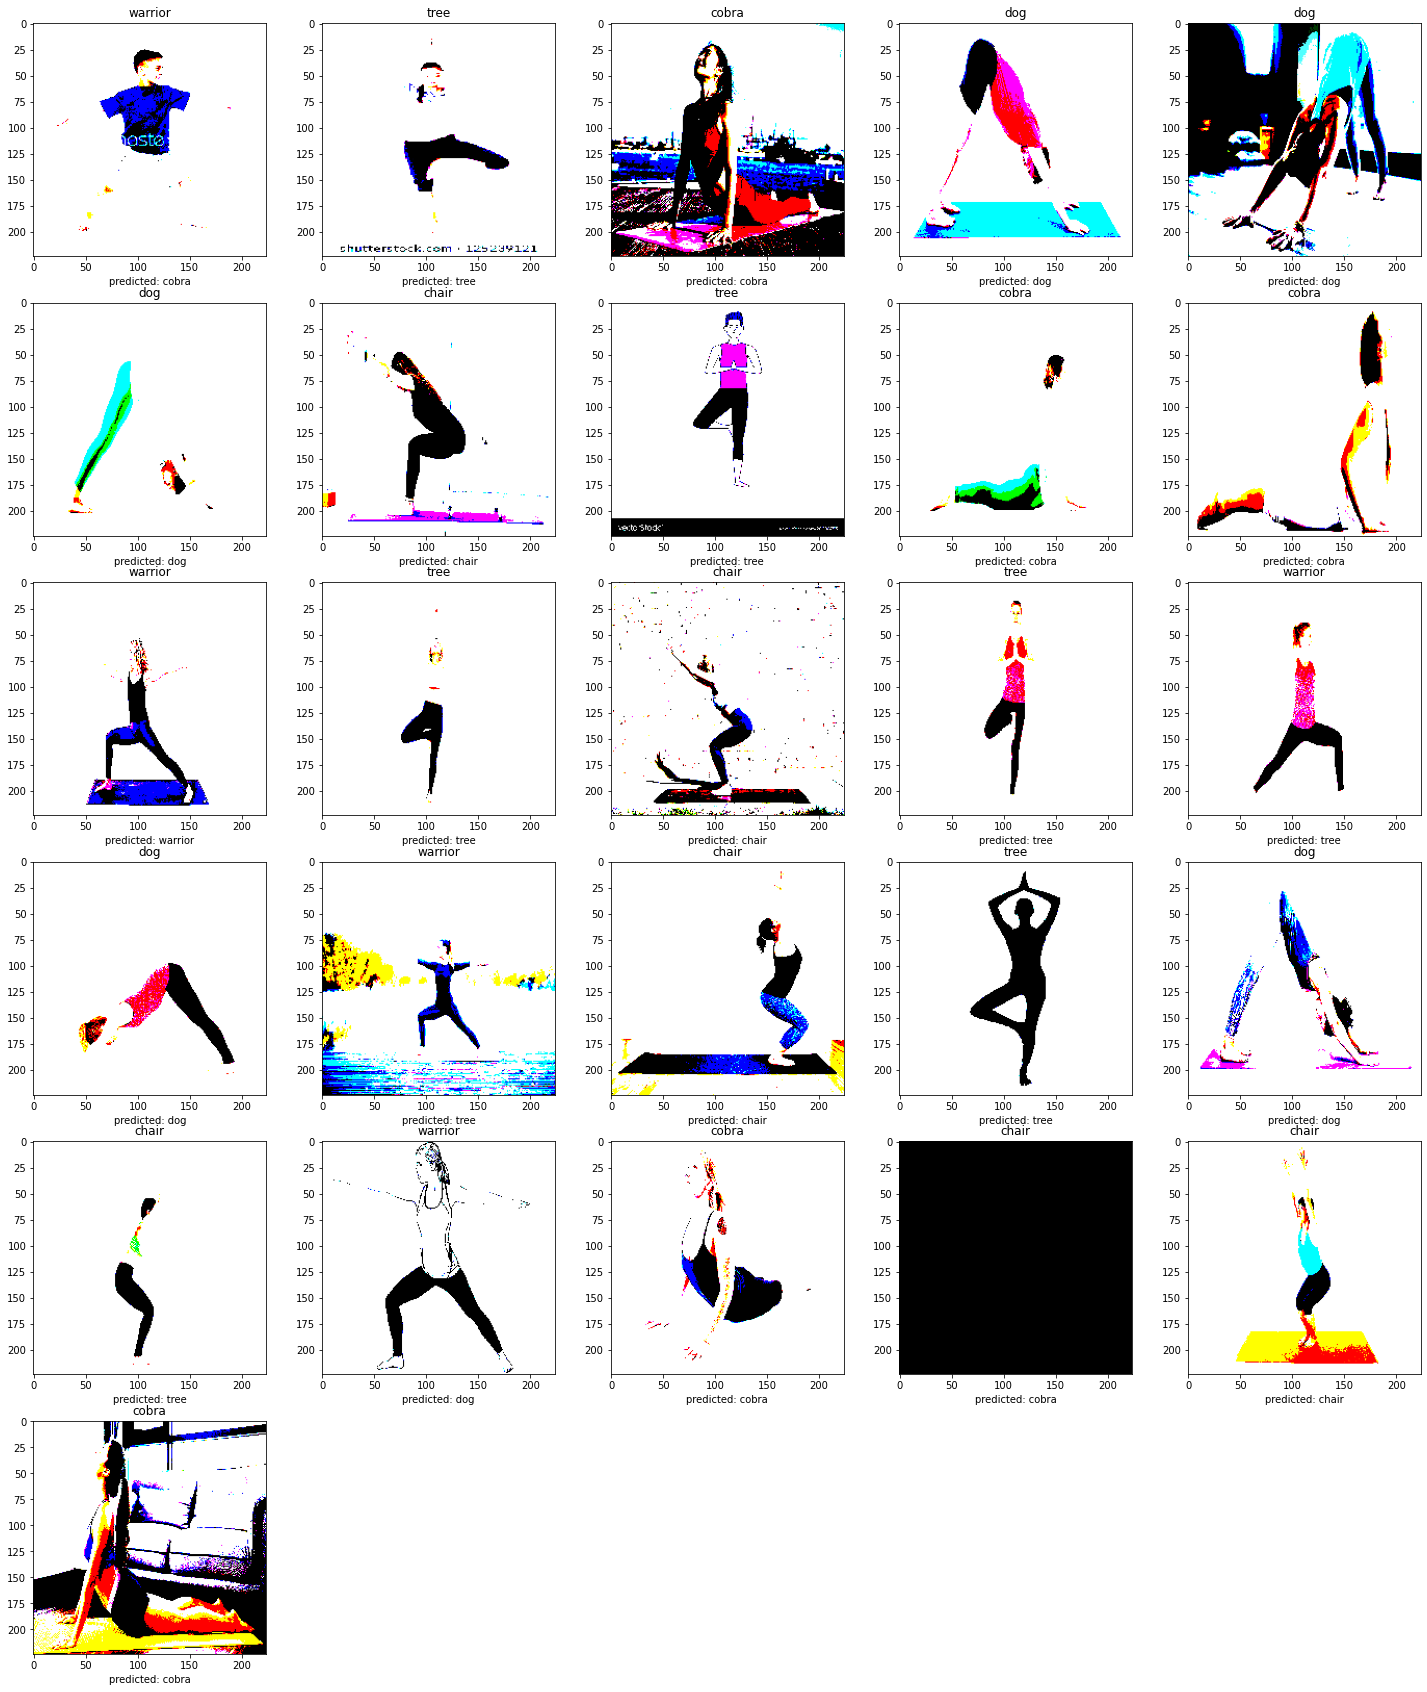

In [24]:
## load the model 
model = tf.keras.models.load_model('./model_vgg19_4')
##

loops = int(np.round(test_ds_2.n/32)) ## no of batches 
actual = np.array([])
predicted = np.array([])
img = []
for k in range(loops):
    x,y = test_ds_2.next()
    predictions =  np.argmax(model.predict(x), axis = -1)
    img.append(x)
    predicted = np.concatenate([predicted ,predictions])
    actual = np.concatenate([actual , np.argmax(y,axis=1)])
    
##
print('Classification Report for new test images ')
print(classification_report(actual, predicted, target_names=[v for k,v in labels_dict.items()]))
##
plt.figure(figsize=(25, 30))
for i in range(26):
    ax = plt.subplot(6, 5, i + 1)
    
    plt.imshow(cv2.cvtColor(img[0][i], cv2.COLOR_BGR2RGB))
    label = actual[i]
    pred_label = predicted[i]
    name = labels_dict[label]
    plt.title(name)
    plt.xlabel('predicted: ' + labels_dict[pred_label])
    #plt.axis("off")

With fine tuning , accuracy on new test images has inched further from 0.73 to 0.77 as shown above.